# Decision Tree

## 決策樹的訓練過程
- 決策樹是一種監督學習方法，用於分類和回歸任務。
- 它以樹狀結構進行決策，每個節點代表一個特徵，每個分支代表該特徵的一個值或範圍，每個葉子節點代表一個分類或回歸結果。
- 決策樹在訓練過程中會從最後上方的樹根開始將資料的特徵將資料分割到不同邊。

## 分割原則
- 從樹根開始分割資料：訓練過程從根節點開始，逐步向下進行，直到所有資料被正確分類或達到某個停止條件。
- 資訊增益 (Information Gain, IG)：決策樹在分割資料時，選擇能夠最大化資訊增益的特徵進行分割。資訊增益衡量了分割前後資訊量的減少程度。
    - 希望資訊量最大：我們希望每次分割後的資訊增益最大，這意味著分割後的節點中的資料更加純淨，即資料更加接近同一類別。
    - 分割後的資訊量越小越好：這意味著經過分割後，每個子節點中的資料應該盡可能少的混雜不同類別。

## 資訊量的衡量方法
- 熵 (Entropy)：熵是衡量不確定性的一種方式。熵越大，資料的不確定性越高，越混亂。目標是通過分割資料來減少熵。
- Gini不純度 (Gini Impurity)：Gini不純度衡量的是在隨機選擇一個樣本時，該樣本被錯誤分類的概率。Gini不純度越小，資料越純。

```mermaid

graph TD
style G fill:#87CEEB,stroke:#333,stroke-width:2px
    A[溫度] -->|<120| B[難吃的披薩]
    A -->|120-125| D[溼度]
    D -->|<5%| E[難吃的披薩]
    D -->|5%-7%| G[美味的披薩]
    D -->|>7%| F[難吃的披薩]
    A -->|>125| C[難吃的披薩]

# entropy

## 載入Iris資料集

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
sys.path.append(os.path.abspath('./')) #for import common.utility
from utility import plot_confusion_matrix,plot_decision_regions,testcase_report

### 只用2個特徵進行分類
'sepal length (cm)', 'petal length (cm)'

只使用 'sepal length (cm)' 和 'petal length (cm)' 特徵且只取 target 為 1 和 2 的樣本

In [2]:
# 加載Iris數據集
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("feature_names: "+str(iris['feature_names']))
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])

iris_data = pd.concat([x, y], axis=1)

# 只使用 'sepal length (cm)' 和 'petal length (cm)' 特徵且只取 target 為 1 和 2 的樣本
iris_data = iris_data[iris_data['target'].isin([1, 2])]
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
print(iris_data.shape)

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']
(100, 3)


In [3]:
iris_data.head()

,sepal length (cm),petal length (cm),target
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 將資料的70%拿出來train，剩下的30％用來檢測train的好壞

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.drop(['target'],axis=1), iris_data['target'], test_size=0.3,random_state = 1)

## Decision Tree 不需要做特徵標準化

In [6]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

## DecisionTreeClassifier 參數

```
criterion: entropy, gini impurity
max_depth: 主要是可以防止樹長得過高造成overfit
max_features: 最多只能挑K種feature去分類
min_samples_leaf: leaf node最小sample數
```

In [7]:
from sklearn.tree import DecisionTreeClassifier

### **use entropy as a criterion**

In [8]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=0) # max_depth=1,3,12

### class sklearn.tree.DecisionTreeClassifier
```
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
```

In [9]:
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

## 計算正確率

In [10]:
print('training score:',clf_entropy.score(X_train,y_train))
print('test score:',clf_entropy.score(X_test,y_test))

training score: 0.9857142857142858
test score: 0.8666666666666667


In [11]:
y_test.values

array([2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 1])

In [12]:
clf_entropy.predict(X_test)

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1])

### training Report

In [13]:
def test_report(dataset, classifier, X_test, ground_truth):
    # 複製測試集數據
    X_test_copy = X_test.copy()
    # 使用分類器進行預測
    pred = classifier.predict(X_test_copy)
    # 找出預測錯誤的索引
    error_index = np.where(pred != ground_truth)[0]
    
    # 計算並打印準確率
    accuracy = 1 - len(error_index) / len(X_test_copy)
    print(f'accuracy: {accuracy:.2f}')
    
    # 打印錯誤索引和錯誤分類的數量
    print('error_index:', error_index)
    print(f'number of errors: {len(error_index)}/{len(X_test_copy)}')
    
    # 找出錯誤數據的原始索引並打印
    data_index = X_test_copy.iloc[error_index].index
    print('error data index:', data_index)
    
    # 在測試集中加入真實標籤和預測標籤
    X_test_copy['target'] = ground_truth
    X_test_copy['pred'] = pred
    
    # 篩選出錯誤分類的數據
    only_mis = X_test_copy[X_test_copy['pred'] != X_test_copy['target']]
    
    # 返回錯誤分類的數據和所有預測結果的數據集
    return only_mis, X_test_copy

In [14]:
report=test_report(iris_data,clf_entropy,X_train,y_train)
report[0]

accuracy: 0.99
error_index: [54]
number of errors: 1/70
error data index: Index([70], dtype='int64')


,sepal length (cm),petal length (cm),target,pred
70,5.9,4.8,1,2


In [15]:
report=testcase_report(iris_data,clf_entropy,X_train,X_train,y_train)
report[0]

accuracy: 0.9857142857142858
error_index : [54]
number of errors :1/70
error data index: Index([70], dtype='int64')


,sepal length (cm),petal length (cm),target,pred
70,5.9,4.8,1,2


###  test Report

In [16]:
report=test_report(iris_data,clf_entropy,X_test,y_test)
report[0]

accuracy: 0.87
error_index: [ 2 12 21 27]
number of errors: 4/30
error data index: Index([83, 106, 123, 77], dtype='int64')


,sepal length (cm),petal length (cm),target,pred
83,6.0,5.1,1,2
106,4.9,4.5,2,1
123,6.3,4.9,2,1
77,6.7,5.0,1,2


In [17]:
report=testcase_report(iris_data,clf_entropy,X_test,X_test,y_test)
report[0]

accuracy: 0.8666666666666667
error_index : [ 2 12 21 27]
number of errors :4/30
error data index: Index([83, 106, 123, 77], dtype='int64')


,sepal length (cm),petal length (cm),target,pred
83,6.0,5.1,1,2
106,4.9,4.5,2,1
123,6.3,4.9,2,1
77,6.7,5.0,1,2


## 樹視覺化

scikit-learn中決策樹的視覺化一般需要安裝graphviz。
- 安裝graphviz
  - 下載windows GraphViz's工具: https://graphviz.gitlab.io/_pages/Download/Download_windows.html
- 安裝graphviz: `conda install graphviz`
- 安裝pydotplus: `conda install pydotplus`

還是找不到graphviz，可以在程式碼裡面加入這一行
`os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'`
   
Open "command or conda prompt" and run:
```
conda update conda
conda update anaconda
```

In [18]:
from sklearn.tree import export_graphviz
from sklearn import tree
import os
os.environ['PATH'] = os.environ['PATH'] + (';c:\\Program Files (x86)\\Graphviz-12.0.0-win64\\bin\\')

### 方法1：使用 pydotplus 直接生成 iris.pdf

In [19]:
import pydotplus

# 將決策樹導出為 GraphViz 格式
dot_data = tree.export_graphviz(clf_entropy, out_file=None)

# 使用 pydotplus 將 GraphViz 文件轉換為圖像
graph = pydotplus.graph_from_dot_data(dot_data)

# 檢查是否存在輸出目錄，若不存在則創建
if not os.path.exists('output'):
    os.mkdir('output')

# 將圖像寫入 PDF 文件
graph.write_pdf('output/iris.pdf')

True

### 方法2：直接在 jupyter notebook 中生成

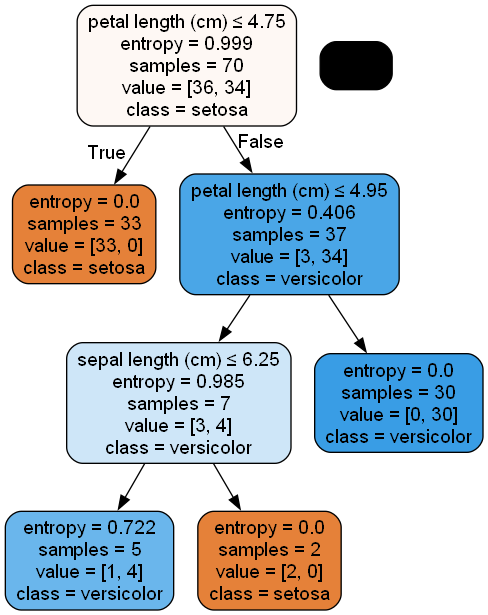

In [20]:
from IPython.display import Image

# 將 Decisson Tree Classifier 放入
dot_data = tree.export_graphviz(clf_entropy, out_file=None,
                         feature_names= ['sepal length (cm)', 'petal length (cm)'],
                         class_names=iris.target_names,
                         filled=True, rounded=True,  
                         special_characters=True)   
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

### Return the feature importances.

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It

In [21]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
clf_entropy.feature_importances_

array([0.04954031, 0.95045969])

## 用2特徵進行分類
`petal width (cm)`
`petal length (cm)`

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']


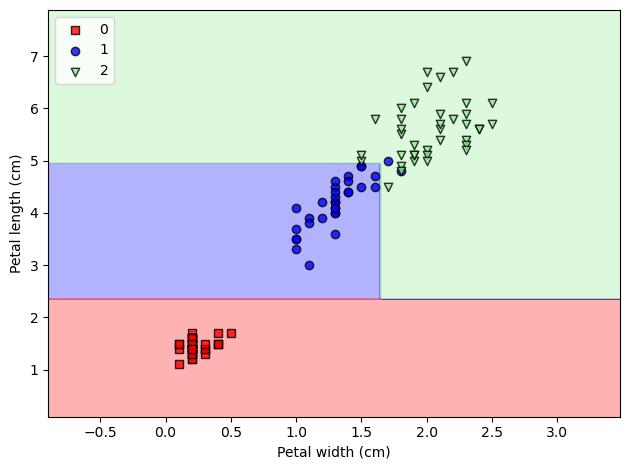

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
import numpy as np

# 載入iris資料集
iris = datasets.load_iris()

# 將資料轉換為DataFrame
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("feature_names: "+str(iris['feature_names']))
print("target_names: "+str(iris['target_names']))

y = pd.DataFrame(iris['target'], columns=['target'])

# 合併資料集
iris_data = pd.concat([x, y], axis=1)
# 只使用 'petal width (cm)' 和 'petal length (cm)' 特徵
iris_data = iris_data[['petal width (cm)', 'petal length (cm)', 'target']]

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['petal width (cm)', 'petal length (cm)']], iris_data['target'], test_size=0.3, random_state=0)

# 訓練決策樹模型
clf_entropy_1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_entropy_1.fit(X_train, y_train)

# 定義繪製決策邊界的函數
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'o', 'v', '^', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(pd.DataFrame(np.array([xx1.ravel(), xx2.ravel()]).T, columns=X.columns))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl].iloc[:, 0], y=X[y == cl].iloc[:, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'{cl}', edgecolor='black')

# 視覺化決策樹的決策邊界
# 繪製訓練集的決策邊界
plot_decision_regions(X_train, y_train, classifier=clf_entropy_1)
plt.xlabel('Petal width (cm)')
plt.ylabel('Petal length (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 用所有特徵進行分類

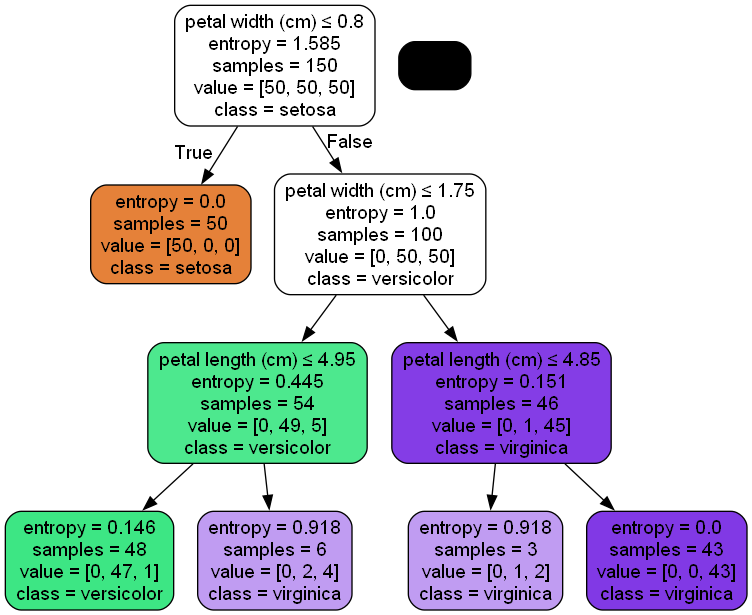

In [24]:
# 匯入必要的函式庫
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image

# 載入Iris資料集
iris = load_iris()
X, y = iris.data, iris.target

# 建立Decision Tree分類器
clf_entropy_2 = DecisionTreeClassifier(criterion='entropy')
clf_entropy_2 = clf_entropy.fit(X, y)

# 將Decision Tree視覺化
dot_data = tree.export_graphviz(clf_entropy_2, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)   
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# gini

In [25]:
# 加載Iris數據集
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("feature_names: "+str(iris['feature_names']))
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])

iris_data = pd.concat([x, y], axis=1)

# 只使用 'sepal length (cm)' 和 'petal length (cm)' 特徵且只取 target 為 1 和 2 的樣本
iris_data = iris_data[iris_data['target'].isin([1, 2])]
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
print(iris_data.shape)

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']
(100, 3)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.drop(['target'], axis=1), iris_data['target'], test_size=0.3, random_state=1)

In [27]:
X_train.head()

,sepal length (cm),petal length (cm)
117,7.7,6.7
149,5.9,5.1
104,6.5,5.8
145,6.7,5.2
138,6.0,4.8


In [28]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

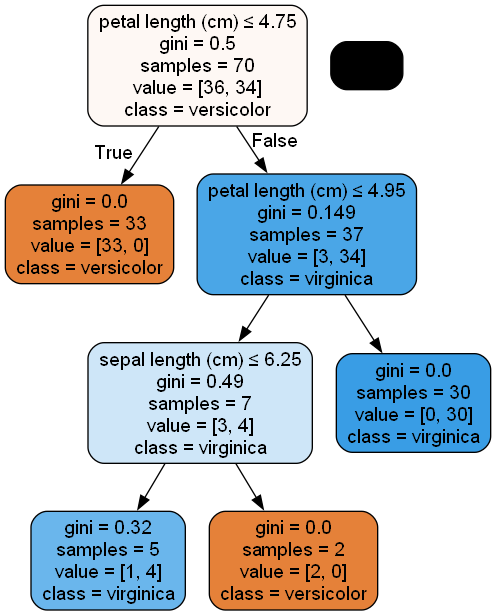

In [29]:
from IPython.display import Image

#將 Decisson Tree Classifier 放入
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                         feature_names=['sepal length (cm)', 'petal length (cm)'],  
                         class_names=iris.target_names[1:3],
                         filled=True, rounded=True,  
                         special_characters=True)   
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

## 只挑2個特徵進行分類
`petal width (cm)`
`petal length (cm)`

In [30]:
# 加載Iris數據集
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("feature_names: "+str(iris['feature_names']))
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])

iris_data = pd.concat([x, y], axis=1)

# 只使用 'petal width (cm)' 和 'petal length (cm)' 特徵且只取 target 為 1 和 2 的樣本
iris_data = iris_data[iris_data['target'].isin([1, 2])]
iris_data = iris_data[['petal width (cm)', 'petal length (cm)', 'target']]
print(iris_data.shape)

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']
(100, 3)


In [31]:
iris_data.head()

,petal width (cm),petal length (cm),target
50,1.4,4.7,1
51,1.5,4.5,1
52,1.5,4.9,1
53,1.3,4.0,1
54,1.5,4.6,1


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['petal width (cm)','petal length (cm)']], iris_data['target'], test_size=0.3, random_state=0)

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf_gini_1 = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state=0)
clf_gini_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

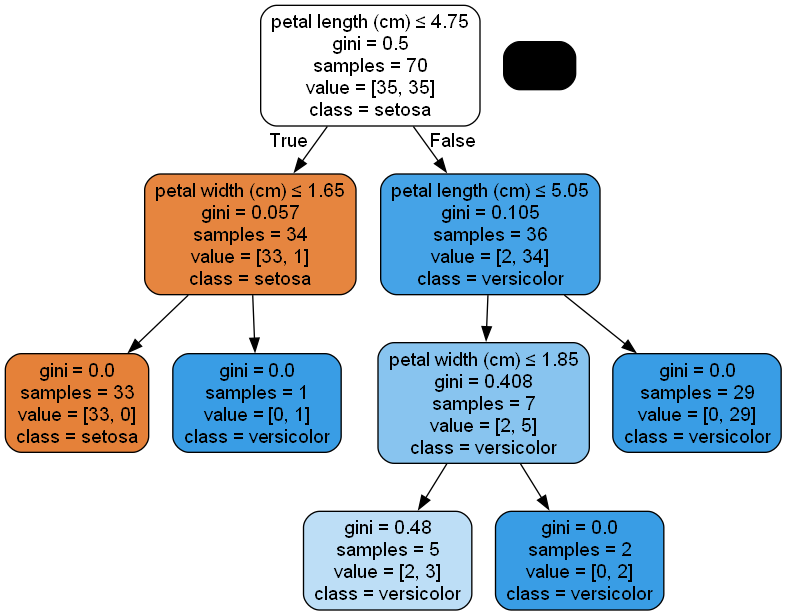

In [34]:
from IPython.display import Image  
# 將 Decisson Tree Classifier 放入
dot_data = tree.export_graphviz(clf_gini_1, out_file=None,
                         feature_names=['petal width (cm)','petal length (cm)'],  
                         class_names=iris.target_names,
                         filled=True, rounded=True,  
                         special_characters=True)   
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

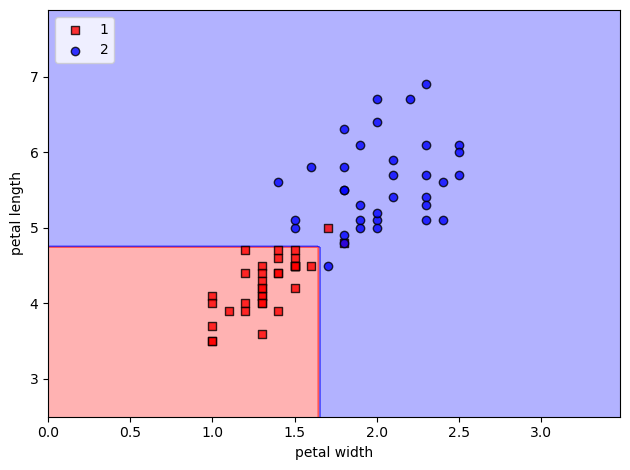

In [35]:
plot_decision_regions(X_train, y_train, classifier=clf_gini_1)
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Random Forest 隨機森林分類器

* Step1. 建立特徵X，與目標y
* Step2. 將資料區分成訓練集與測試集，可自行設定區分的百分比
    - `X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)`
* Step3. 選擇隨機森林分類器，內容可決定決策數的棵樹、剪枝葉等等，以提升模型的效率及避免過度配適
    - `rfc=RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10)`
* Step4. 用建立好的模型來預測資料
    - `rfc.predict(X_test)`
* Step5. 檢驗模型的正確率
    - `rfc.score(X_test,y_test)`

In [36]:
from sklearn.ensemble import RandomForestClassifier

# 加載Iris數據集
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])

iris_data = pd.concat([x, y], axis=1)

# 只取 target 1,2
# iris_data = iris_data[iris_data['target'].isin([1, 2])]
iris_data.head()

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


用2特徵進行分類

`petal width (cm)`
`petal length (cm)`

In [37]:
# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['petal width (cm)', 'petal length (cm)']], iris_data['target'], test_size=0.3, random_state=0)

In [38]:
# 訓練隨機森林分類器
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0, n_jobs=8)

In [39]:
X_train.keys()

Index(['petal width (cm)', 'petal length (cm)'], dtype='object')

In [40]:
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=8,
                       random_state=0)

## 計算分數

In [41]:
print('training score:',forest.score(X_train,y_train))
print('test score:',forest.score(X_test,y_test))

training score: 0.9809523809523809
test score: 0.9555555555555556


In [42]:
report=testcase_report(iris_data,forest,X_train,X_train,y_train)
report[0]

accuracy: 0.9809523809523809
error_index : [11 74]
number of errors :2/105
error data index: Index([106, 138], dtype='int64')


,petal width (cm),petal length (cm),target,pred
106,1.7,4.5,2,1
138,1.8,4.8,2,1


In [43]:
report=testcase_report(iris_data,forest,X_test,X_test,y_test)
report[0]

accuracy: 0.9555555555555556
error_index : [24 37]
number of errors :2/45
error data index: Index([126, 83], dtype='int64')


,petal width (cm),petal length (cm),target,pred
126,1.8,4.8,2,1
83,1.6,5.1,1,2


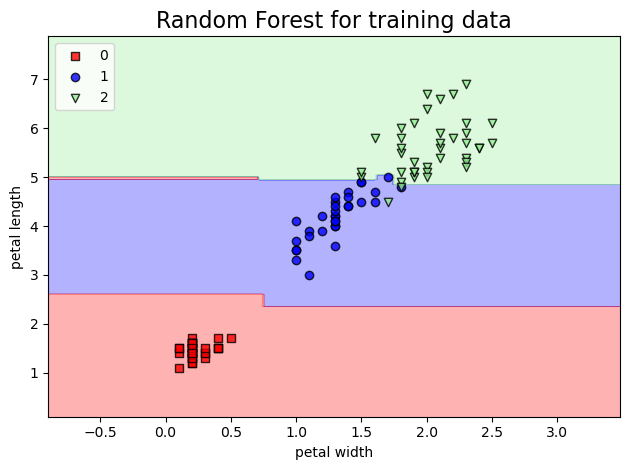

In [44]:
# 繪製訓練數據的決策邊界
plot_decision_regions(X_train, y_train, classifier=forest)
plt.title('Random Forest for training data',fontsize=16)
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

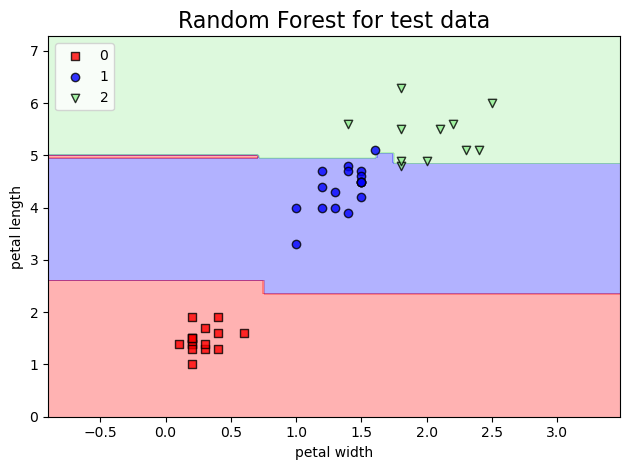

In [45]:
# 繪製測試數據的決策邊界
plot_decision_regions(X_test,y_test, classifier=forest)
plt.title('Random Forest for test data',fontsize=16)
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 利用RandomForest找出Iris data 的分類主要特徵

In [46]:
# 加載Iris數據集
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])

iris_data = pd.concat([x, y], axis=1)

# 只取 target 1,2
# iris_data = iris_data[iris_data['target'].isin([1, 2])]

iris_data.head()

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(
     iris_data.drop(['target'],axis=1), iris_data['target'], test_size=0.3, random_state=0)

In [48]:
forest_1 = RandomForestClassifier(criterion='entropy', n_estimators=10,random_state=0,n_jobs=8) 

In [49]:
forest_1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=8,
                       random_state=0)

In [50]:
importances = forest_1.feature_importances_ # 現在特徵的重要性
print(importances)
indices = np.argsort(importances)  # np.argsort :Returns the indices that would sort an array. 
print(indices) # 排序索引(最小開始編號)

[0.13385803 0.02750716 0.38149926 0.45713555]
[1 0 2 3]


In [51]:
features =X_train.keys()
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [52]:
features[indices]

Index(['sepal width (cm)', 'sepal length (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Index(['sepal width (cm)', 'sepal length (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


Text(0.5, 0, 'Relative Importance')

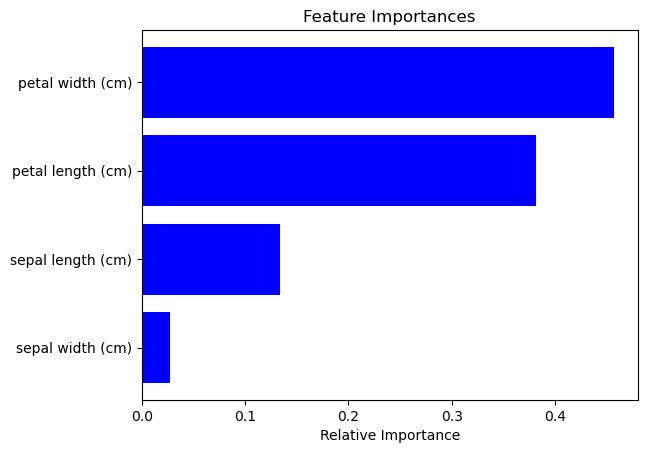

In [53]:
plt.figure(1)
print(features[indices])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')